In [1]:
import spsa_NAS
from spsa_NAS import load_wine_data, run_NAS_spsa, final_accuracy, grid_search

# Load the Wine Quality dataset
X_train, X_val, X_test, y_train, y_val, y_test, num_classes = load_wine_data()

2025-06-13 01:56:35.241660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Grid search benchmark ###

In [2]:
# Grid search architecture benchmark
best_grid_arch, worst_grid_arch = grid_search(X_train, X_val, y_train, y_val, num_classes)
best_grid_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_grid_arch)
worst_grid_acc= final_accuracy(X_train, X_test, y_train, y_test, num_classes,worst_grid_arch)

print(f"Best Grid Search Architecture {best_grid_arch} : Accuracy {best_grid_acc:.4f}")
print(f"Worst Grid Search Architecture {worst_grid_arch} : Accuracy {worst_grid_acc:.4f}")

Configuration 01: Loss=1.2234, Arch=[32, 32, 0]
Configuration 02: Loss=1.1425, Arch=[32, 32, 64]
Configuration 03: Loss=1.1140, Arch=[32, 32, 128]
Configuration 04: Loss=1.0755, Arch=[32, 32, 256]
Configuration 05: Loss=1.0986, Arch=[32, 64, 0]
Configuration 06: Loss=1.0701, Arch=[32, 64, 64]
Configuration 07: Loss=1.0223, Arch=[32, 64, 128]
Configuration 08: Loss=1.0530, Arch=[32, 64, 256]
Configuration 09: Loss=1.0690, Arch=[32, 128, 0]
Configuration 10: Loss=1.0185, Arch=[32, 128, 64]
Configuration 11: Loss=1.0416, Arch=[32, 128, 128]
Configuration 12: Loss=1.0078, Arch=[32, 128, 256]
Configuration 13: Loss=1.0127, Arch=[32, 256, 0]
Configuration 14: Loss=1.0225, Arch=[32, 256, 64]
Configuration 15: Loss=0.9823, Arch=[32, 256, 128]
Configuration 16: Loss=0.9982, Arch=[32, 256, 256]
Configuration 17: Loss=0.9938, Arch=[32, 512, 0]
Configuration 18: Loss=1.0258, Arch=[32, 512, 64]
Configuration 19: Loss=0.9762, Arch=[32, 512, 128]
Configuration 20: Loss=0.9943, Arch=[32, 512, 256]
Con

### Architecture optimization via SPSA 

Iter 01: Loss=0.9449, Best Loss=0.9449, Arch=[155, 155, 63], Best Arch=[155, 155, 63]
Iter 02: Loss=0.9346, Best Loss=0.9346, Arch=[196, 196, 84], Best Arch=[196, 196, 84]
Iter 03: Loss=0.9169, Best Loss=0.9169, Arch=[228, 216, 95], Best Arch=[228, 216, 95]
Iter 04: Loss=0.9056, Best Loss=0.9056, Arch=[325, 154, 141], Best Arch=[325, 154, 141]
Iter 05: Loss=0.9249, Best Loss=0.9056, Arch=[395, 113, 172], Best Arch=[325, 154, 141]
Iter 06: Loss=0.9270, Best Loss=0.9056, Arch=[450, 89, 197], Best Arch=[325, 154, 141]
Iter 07: Loss=0.9367, Best Loss=0.9056, Arch=[494, 74, 213], Best Arch=[325, 154, 141]
Iter 08: Loss=0.9134, Best Loss=0.9056, Arch=[524, 66, 226], Best Arch=[325, 154, 141]
Iter 09: Loss=0.9208, Best Loss=0.9056, Arch=[545, 61, 235], Best Arch=[325, 154, 141]
Iter 10: Loss=0.9148, Best Loss=0.9056, Arch=[560, 58, 242], Best Arch=[325, 154, 141]
Iter 11: Loss=0.9258, Best Loss=0.9056, Arch=[571, 57, 248], Best Arch=[325, 154, 141]
Iter 12: Loss=0.9286, Best Loss=0.9056, Arch

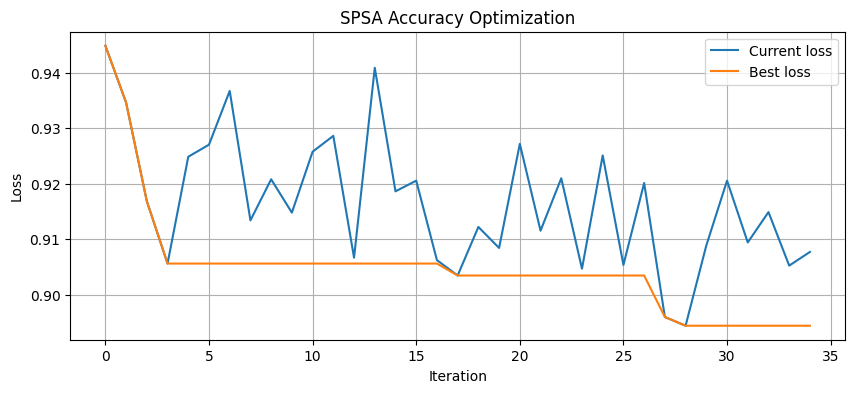

Best architecture: [640, 122, 258]
SPSA Architecture [640, 122, 258] - Accuracy: 0.6125


In [3]:
# Run spsa with small initial layer sizes
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.1, 0.1, 0.1], a=0.5, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy: {spsa_acc:.4f}")

Iter 01: Loss=0.9220, Best Loss=0.9220, Arch=[521, 521, 259], Best Arch=[521, 521, 259]
Iter 02: Loss=0.9106, Best Loss=0.9106, Arch=[517, 518, 261], Best Arch=[517, 518, 261]
Iter 03: Loss=0.8932, Best Loss=0.8932, Arch=[517, 518, 263], Best Arch=[517, 518, 263]
Iter 04: Loss=0.9282, Best Loss=0.8932, Arch=[520, 521, 266], Best Arch=[517, 518, 263]
Iter 05: Loss=0.9092, Best Loss=0.8932, Arch=[524, 521, 270], Best Arch=[517, 518, 263]
Iter 06: Loss=0.8904, Best Loss=0.8904, Arch=[526, 520, 271], Best Arch=[526, 520, 271]
Iter 07: Loss=0.8954, Best Loss=0.8904, Arch=[529, 517, 274], Best Arch=[526, 520, 271]
Iter 08: Loss=0.8905, Best Loss=0.8904, Arch=[533, 514, 275], Best Arch=[526, 520, 271]
Iter 09: Loss=0.8840, Best Loss=0.8840, Arch=[540, 515, 274], Best Arch=[540, 515, 274]
Iter 10: Loss=0.9295, Best Loss=0.8840, Arch=[544, 517, 273], Best Arch=[540, 515, 274]
Iter 11: Loss=0.9256, Best Loss=0.8840, Arch=[547, 518, 273], Best Arch=[540, 515, 274]
Iter 12: Loss=0.8929, Best Loss=

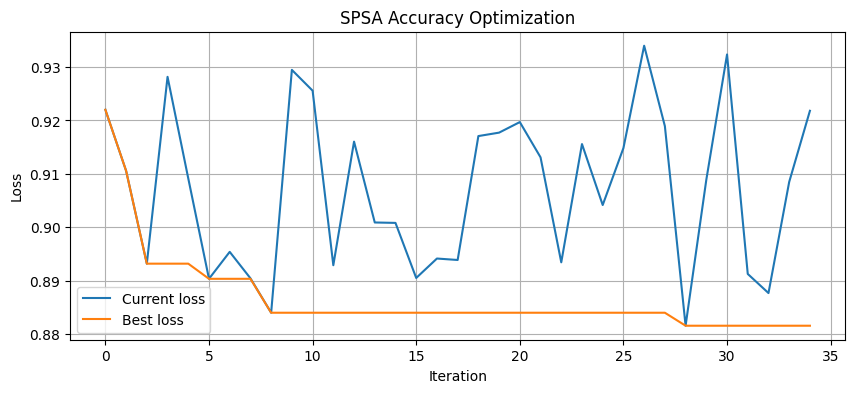

Best architecture: [514, 558, 282]
SPSA Architecture [514, 558, 282] - Accuracy on test set: 0.6062


In [4]:
# Run NAS spsa with with  medium initial layers sizes
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.5, 0.5, 0.5], a=0.5, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set: {spsa_acc:.4f}")

Iter 01: Loss=0.9573, Best Loss=0.9573, Arch=[132, 129, 51], Best Arch=[132, 129, 51]
Iter 02: Loss=0.9470, Best Loss=0.9470, Arch=[136, 131, 50], Best Arch=[136, 131, 50]
Iter 03: Loss=0.9499, Best Loss=0.9470, Arch=[139, 132, 50], Best Arch=[136, 131, 50]
Iter 04: Loss=0.9425, Best Loss=0.9425, Arch=[143, 134, 49], Best Arch=[143, 134, 49]
Iter 05: Loss=0.9348, Best Loss=0.9348, Arch=[147, 136, 48], Best Arch=[147, 136, 48]
Iter 06: Loss=0.9335, Best Loss=0.9335, Arch=[151, 140, 46], Best Arch=[151, 140, 46]
Iter 07: Loss=0.9287, Best Loss=0.9287, Arch=[156, 144, 44], Best Arch=[156, 144, 44]
Iter 08: Loss=0.9290, Best Loss=0.9287, Arch=[163, 150, 44], Best Arch=[156, 144, 44]
Iter 09: Loss=0.9460, Best Loss=0.9287, Arch=[170, 157, 45], Best Arch=[156, 144, 44]
Iter 10: Loss=0.9277, Best Loss=0.9277, Arch=[177, 164, 45], Best Arch=[177, 164, 45]
Iter 11: Loss=0.9385, Best Loss=0.9277, Arch=[183, 169, 45], Best Arch=[177, 164, 45]
Iter 12: Loss=0.9280, Best Loss=0.9277, Arch=[189, 174

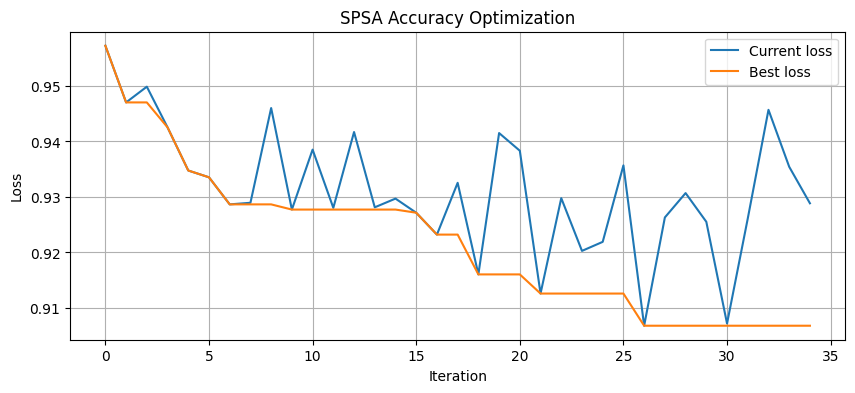

Best architecture: [230, 207, 54]
SPSA Architecture [230, 207, 54] - Accuracy on test set: 0.5500


In [5]:
# Run NAS spsa with small initial layer sizes and small step size
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.1, 0.1, 0.1], a=0.1, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set: {spsa_acc:.4f}")

Iter 01: Loss=0.9052, Best Loss=0.9052, Arch=[829, 829, 407], Best Arch=[829, 829, 407]
Iter 02: Loss=0.9288, Best Loss=0.9052, Arch=[827, 834, 408], Best Arch=[829, 829, 407]
Iter 03: Loss=0.9351, Best Loss=0.9052, Arch=[834, 829, 413], Best Arch=[829, 829, 407]
Iter 04: Loss=0.9048, Best Loss=0.9048, Arch=[842, 828, 415], Best Arch=[842, 828, 415]
Iter 05: Loss=0.8970, Best Loss=0.8970, Arch=[850, 825, 418], Best Arch=[850, 825, 418]
Iter 06: Loss=0.8946, Best Loss=0.8946, Arch=[858, 820, 421], Best Arch=[858, 820, 421]
Iter 07: Loss=0.9199, Best Loss=0.8946, Arch=[866, 820, 422], Best Arch=[858, 820, 421]
Iter 08: Loss=0.9156, Best Loss=0.8946, Arch=[870, 818, 421], Best Arch=[858, 820, 421]
Iter 09: Loss=0.9087, Best Loss=0.8946, Arch=[875, 819, 422], Best Arch=[858, 820, 421]
Iter 10: Loss=0.9349, Best Loss=0.8946, Arch=[881, 819, 422], Best Arch=[858, 820, 421]
Iter 11: Loss=0.9100, Best Loss=0.8946, Arch=[884, 818, 423], Best Arch=[858, 820, 421]
Iter 12: Loss=0.8956, Best Loss=

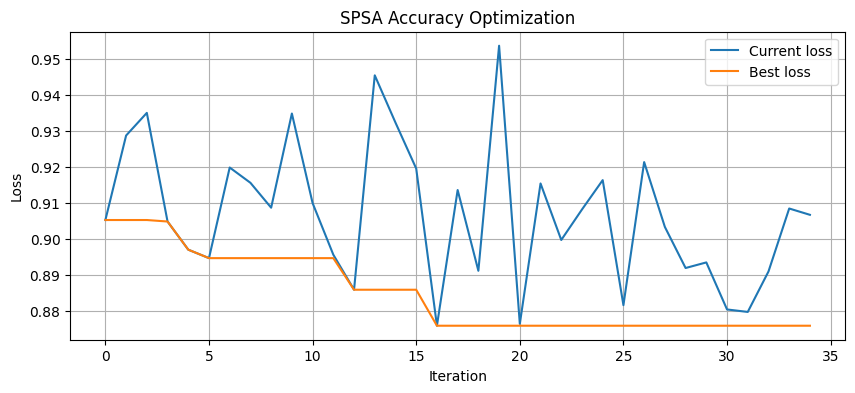

Best architecture: [883, 809, 415]
SPSA Architecture [883, 809, 415] - Accuracy on test set : 0.5750


In [6]:
# Run NAS spsa with large initial layer sizes 
best_spsa_arch = run_NAS_spsa(X_train, X_val, y_train, y_val, num_classes, x0=[0.8, 0.8, 0.8], a=0.5, num_iter=35)
print("Best architecture:", best_spsa_arch)
spsa_acc = final_accuracy(X_train, X_test, y_train, y_test, num_classes, best_spsa_arch)
print(f"SPSA Architecture {best_spsa_arch} - Accuracy on test set : {spsa_acc:.4f}")